Hello,

In this work, I will try to recognize emotions in photographs through a convolutional neural network using a keras library.

In [1]:
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical

c:\users\tmahe\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\tmahe\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\tmahe\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**DATA**


Over 35,000 photographs collected in the data in 2013, some of the existing photographs were taken from various media publications and some of them consist of stock photographs. Our goal here is to recognize 7 different emotions (angry, happy, scared, natural, etc.) through photographs with a convolutional neural network.

[](http://)**Determine a Road Map**

First, we will load our data and examine the various information in it.

Later, we will make our train and test data to be able to model with convolutional neural network and build a model and expect to get a good result.

**UPLOAD DATA**

In [2]:
data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


**FIRST LOOK**

In [3]:
print("Datanın satır ve sütün sayıları = ", data.shape)
print("Sütünların ismi = ", data.columns)

Datanın satır ve sütün sayıları =  (35887, 3)
Sütünların ismi =  Index(['emotion', 'pixels', 'Usage'], dtype='object')


The emotion variable represents emotions and is our target variable.
Pixels variable expresses the value per pixel in the photos.
Usage, on the other hand, shows which set the row it belongs to (such as training and testing).

Let's look at our training and test sets and separate these sets.

In [4]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [5]:
training = data.loc[data["Usage"] == "Training"]
validation = data.loc[data["Usage"] == "PrivateTest"]
test = data.loc[data["Usage"] == "PublicTest"]

print("Shape trainig set = ", training.shape)
print("Shape test set = ", test.shape)
print("Shape validation set = ", validation.shape)

Shape trainig set =  (28709, 3)
Shape test set =  (3589, 3)
Shape validation set =  (3589, 3)


Her bir veri setimizde hangi duygudan ne kadar olduğunu görmek istersek;

In [6]:
print("========================= Emotion Adetleri ===========================")
print("train adet = \n{}, \npublic adet = \n{}, \nprivate adet = \n{}".format(training["emotion"].value_counts(),
      validation["emotion"].value_counts(), test["emotion"].value_counts()))


========================= Emotion Adetleri ===========================
train adet = 
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64, 
public adet = 
3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: emotion, dtype: int64, 
private adet = 
3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64


Yine her bir setimizde "emotion", "pixels" ve "usage" değişkenlerimiz var şimdi eğitim ve test setlerimizi düzenleme işlemlerine geçelim.

**PREPROCESSING**

We will do the same for each set. These:

    1) We will categorize it by taking the "emotion" column which is our answers. In other words, we will output a transaction with 0 in all the remaining lines except the class it is in.
    
    2) We will take the pixels column in our set and turn it into a tensor and standardize it.
     

In [7]:
train_emotions = training["emotion"]
train_emotions = to_categorical(train_emotions)

train_images = training["pixels"].str.split(" ").tolist()
train_images = np.uint8(train_images)
train_images = train_images.reshape((28709, 48, 48, 1))
train_images = train_images.astype("float32") / 255


val_emotions = validation["emotion"]
val_emotions = to_categorical(val_emotions)

val_images = validation["pixels"].str.split(" ").tolist()
val_images = np.uint8(val_images)
val_images = val_images.reshape((3589, 48, 48, 1))
val_images = val_images.astype("float32") / 255


test_emotions = test["emotion"]
test_emotions = to_categorical(test_emotions)

test_images = test["pixels"].str.split(" ").tolist()
test_images = np.uint8(test_images)
test_images = test_images.reshape((3589, 48, 48, 1))
test_images = test_images.astype("float32") / 255

Now let's look at some photos

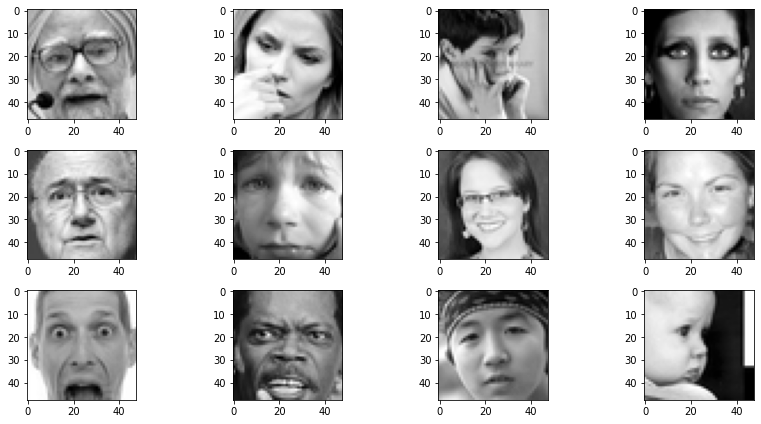

In [9]:
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(train_images[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()


Graf --> [https://www.kaggle.com/omarensaj/fer-emotion-detection-psd07](http://)

So far, we have processed the data and made it ready to build a model, now we can start building the model.

**MODEL**

In [10]:
model_1 = models.Sequential()

# Conv (evrişim katmanı)
model_1.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
#Ortaklama katmanı
model_1.add(layers.MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model_1.add(layers.Flatten())

# Tam bağlantı katmanı
model_1.add(layers.Dense(1024, activation='relu'))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(1024, activation='relu'))
model_1.add(layers.Dropout(0.2))

model_1.add(layers.Dense(7, activation='softmax'))


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 7, 7, 64)         0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         7

The number of transactions in the model output is almost 1.5 million. Let's train the model now

In [12]:
model_1.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

hist = model_1.fit(train_images, train_emotions, batch_size = 256, epochs = 30,
                validation_data = (val_images, val_emotions))


Epoch 1/30
113/113 [==============================] - 58s 501ms/step - loss: 1.8243 - accuracy: 0.2449 - val_loss: 1.8172 - val_accuracy: 0.2449
Epoch 2/30
113/113 [==============================] - 55s 490ms/step - loss: 1.8016 - accuracy: 0.2517 - val_loss: 1.7959 - val_accuracy: 0.2538
Epoch 3/30
113/113 [==============================] - 53s 466ms/step - loss: 1.7044 - accuracy: 0.3016 - val_loss: 1.6467 - val_accuracy: 0.3355
Epoch 4/30
113/113 [==============================] - 53s 466ms/step - loss: 1.5943 - accuracy: 0.3672 - val_loss: 1.5735 - val_accuracy: 0.3670
Epoch 5/30
113/113 [==============================] - 55s 485ms/step - loss: 1.5203 - accuracy: 0.4026 - val_loss: 1.4997 - val_accuracy: 0.4218
Epoch 6/30
113/113 [==============================] - 57s 502ms/step - loss: 1.4468 - accuracy: 0.4416 - val_loss: 1.4335 - val_accuracy: 0.4514
Epoch 7/30
113/113 [==============================] - 58s 516ms/step - loss: 1.3919 - accuracy: 0.4646 - val_loss: 1.3848 - val_ac

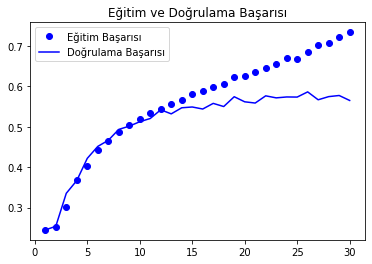

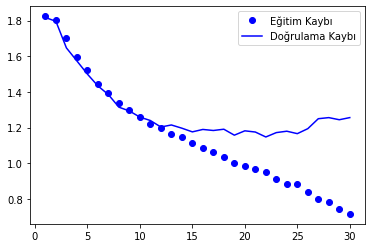

In [13]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Eğitim Başarısı")
plt.plot(epochs, val_acc, "b", label = "Doğrulama Başarısı")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Eğitim Kaybı")
plt.plot(epochs, val_loss, "b", label = "Doğrulama Kaybı")
plt.legend()


plt.show()

In [68]:
test =test_images[40:41, :, :, 0]
print(test_emotions[40])


model_1.predict(test)



[1. 0. 0. 0. 0. 0. 0.]


array([[9.9438691e-01, 2.1258890e-04, 5.0902991e-03, 1.1734173e-06,
        2.8534321e-04, 1.1132744e-05, 1.2548625e-05]], dtype=float32)

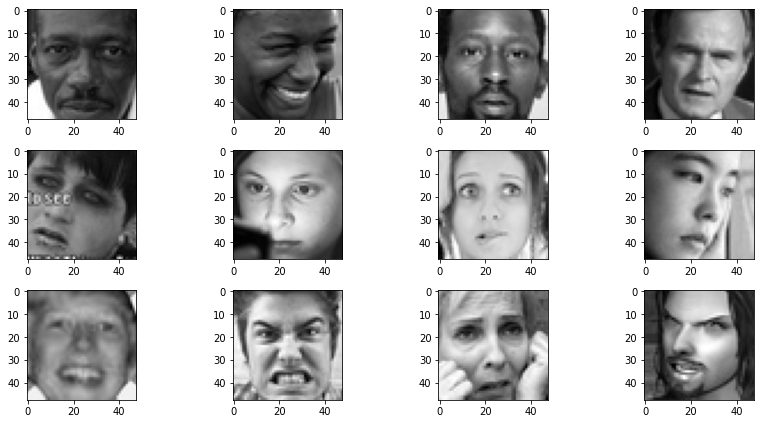

In [64]:

plt.figure(0, figsize=(12,6))
for i in range(31, 43):
    plt.subplot(3,4,i-30)
    plt.imshow(test_images[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()


Model 16-17. After the epoch (1 full round on the data), the training success increases and the test success decreases, that is, it overfit.

In this study, we were able to predict 7 different emotions by 58-60%. Data Diversification can be applied to photos in different filter sizes, more layers or training set to improve the model.

See you...

Thanks.